In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Assuming 'Embarked' is the categorical feature you want to one-hot encode
ohe = OneHotEncoder(sparse_output=False) # sparse=False to get a dense array directly
encoded_data = ohe.fit_transform(df[['Embarked']])

encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Embarked'])) # Use get_feature_names_out for column names
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(['Embarked'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,0.0,0.0,1.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1.0,0.0,0.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,0.0,1.0
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,0.0,0.0,1.0


In [9]:
df = df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

In [11]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked_C,0
Embarked_Q,0
Embarked_S,0


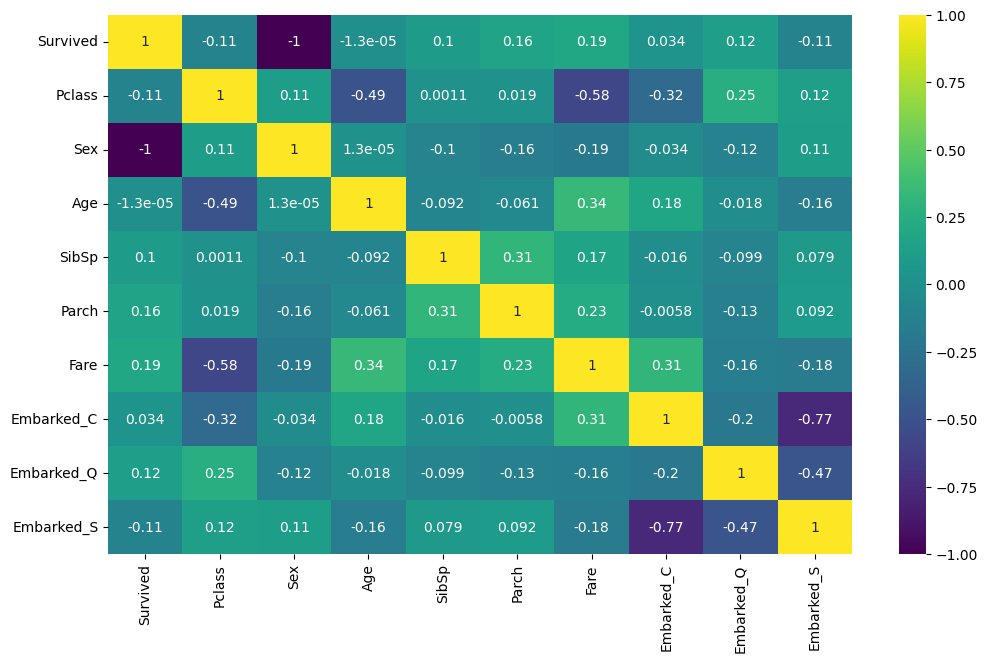

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

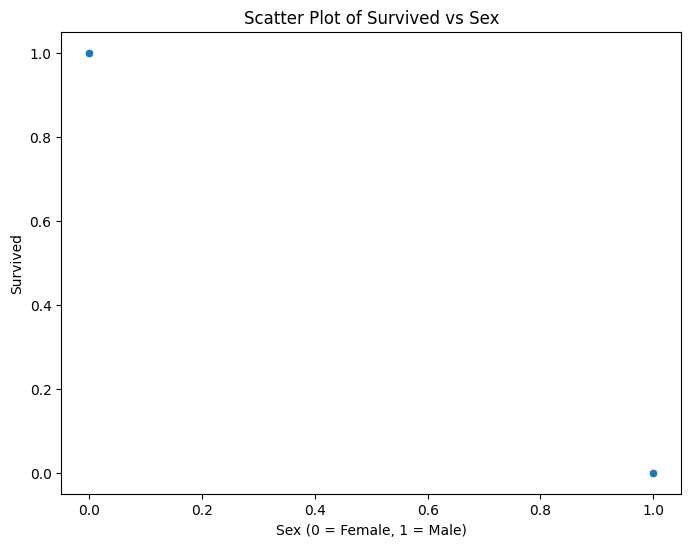

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sex', y='Survived', data=df)
plt.title('Scatter Plot of Survived vs Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Survived')
plt.show()

In [14]:
survived_by_sex = df.groupby('Sex')['Survived'].sum()
survived_by_sex

,Survived
Sex,
0,152
1,0


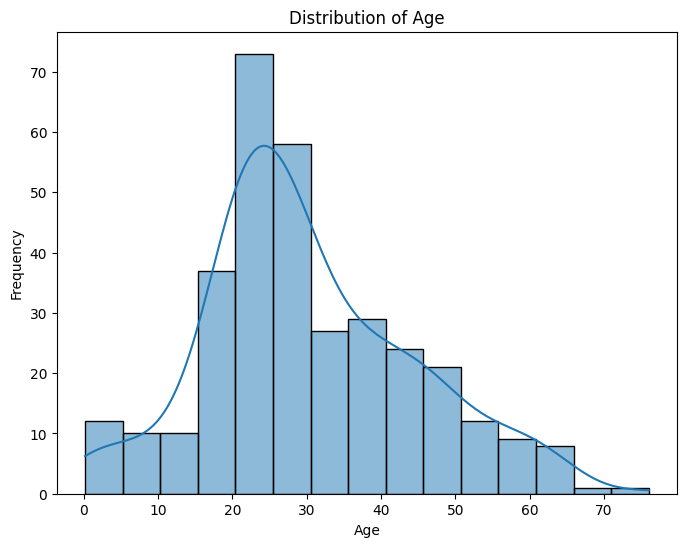

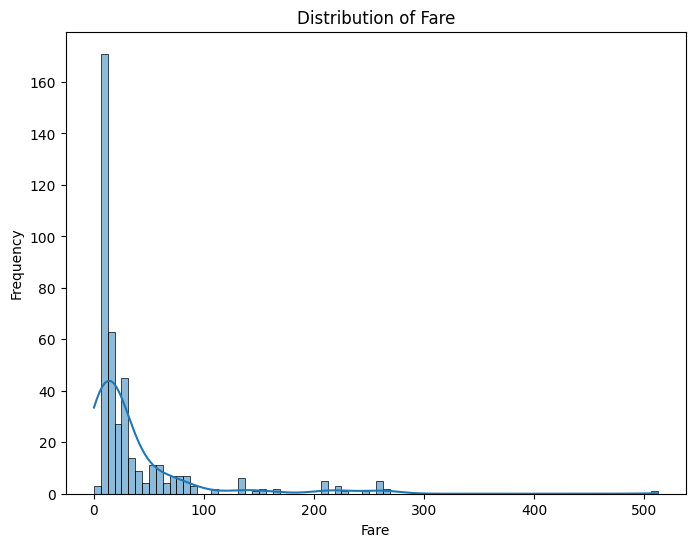

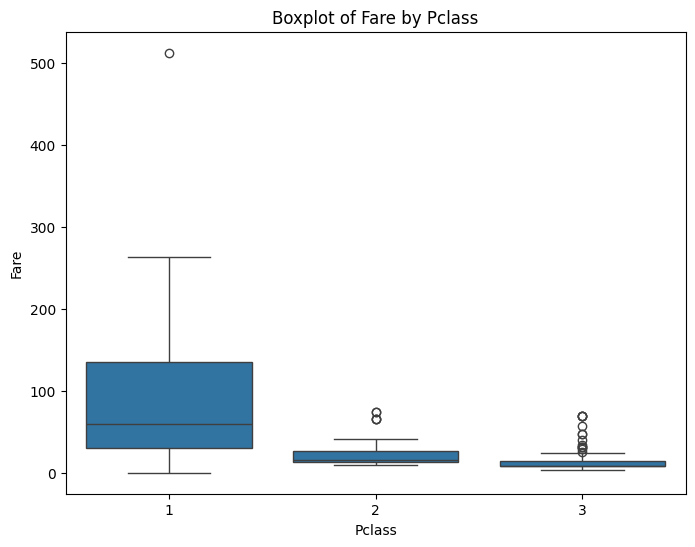

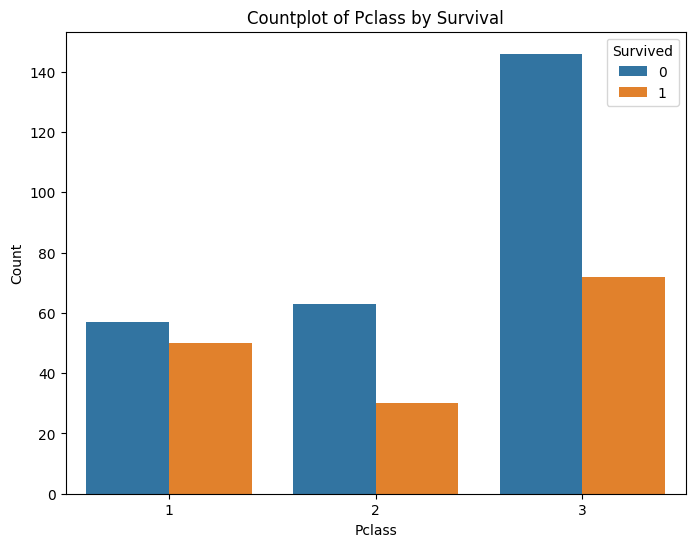

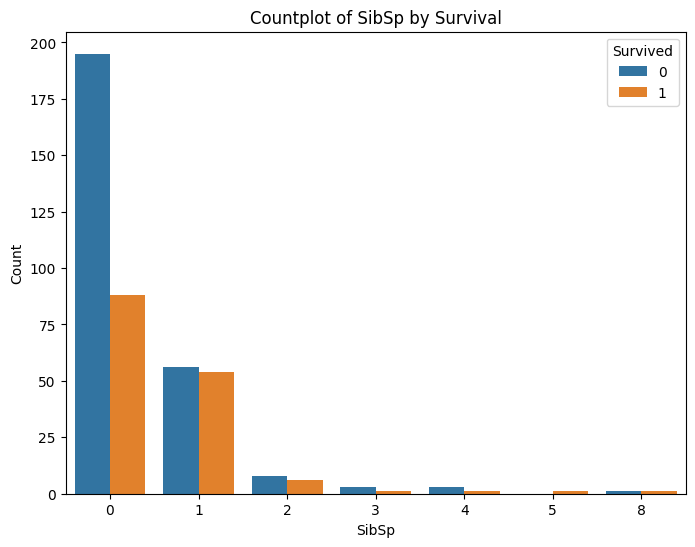

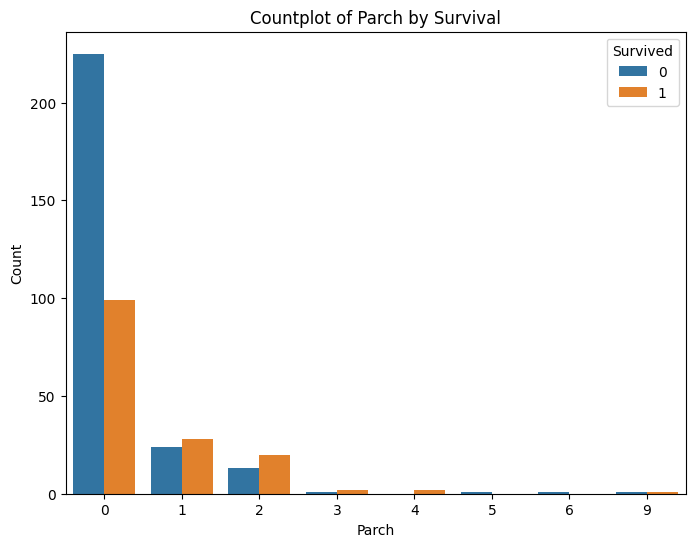

In [16]:
# Plotting the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Fare by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Boxplot of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Countplot of Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Countplot of Pclass by Survival')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Countplot of SibSp
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Countplot of SibSp by Survival')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

# Countplot of Parch
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Countplot of Parch by Survival')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()


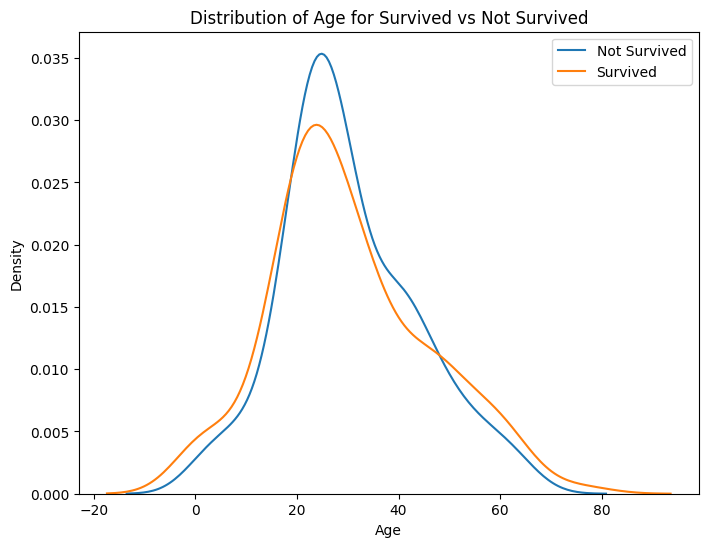

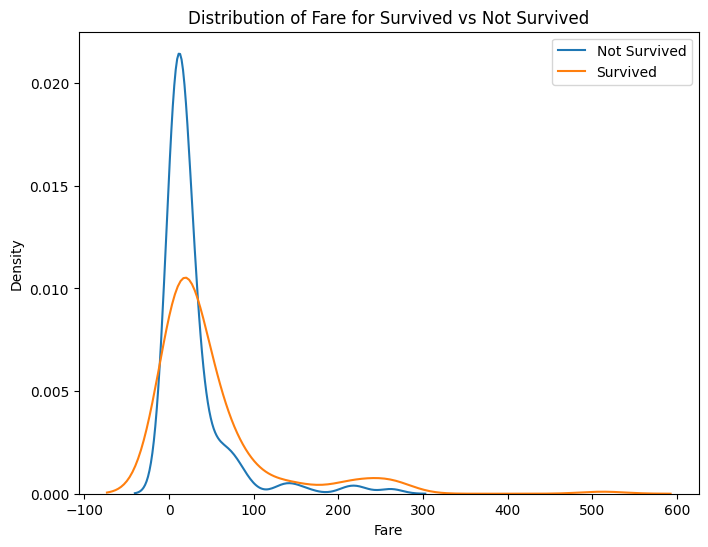

In [19]:
# Plotting the distribution of Age for survived vs not survived
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived')
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived')
plt.title('Distribution of Age for Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting the distribution of Fare for survived vs not survived
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Survived'] == 0]['Fare'], label='Not Survived')
sns.kdeplot(df[df['Survived'] == 1]['Fare'], label='Survived')
plt.title('Distribution of Fare for Survived vs Not Survived')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()


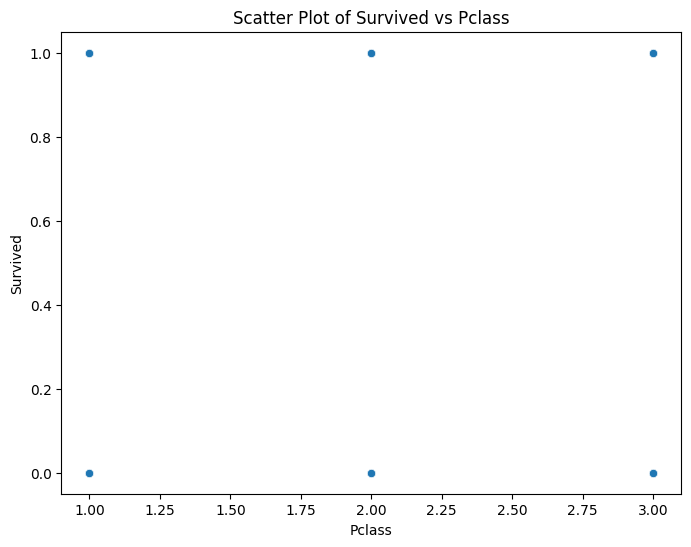

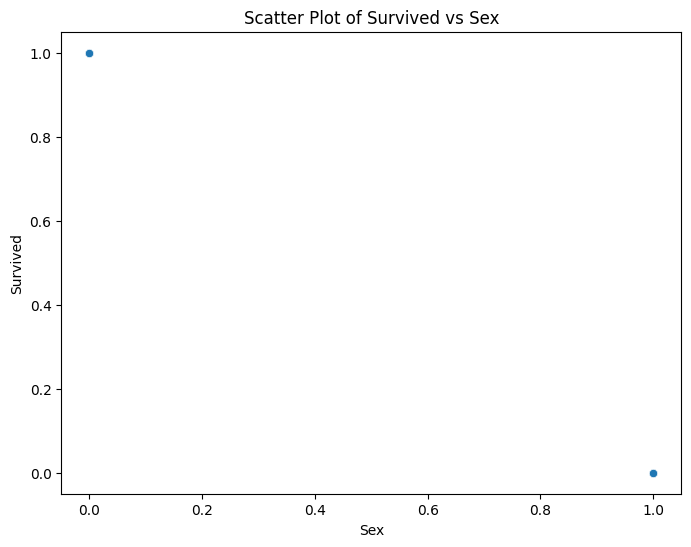

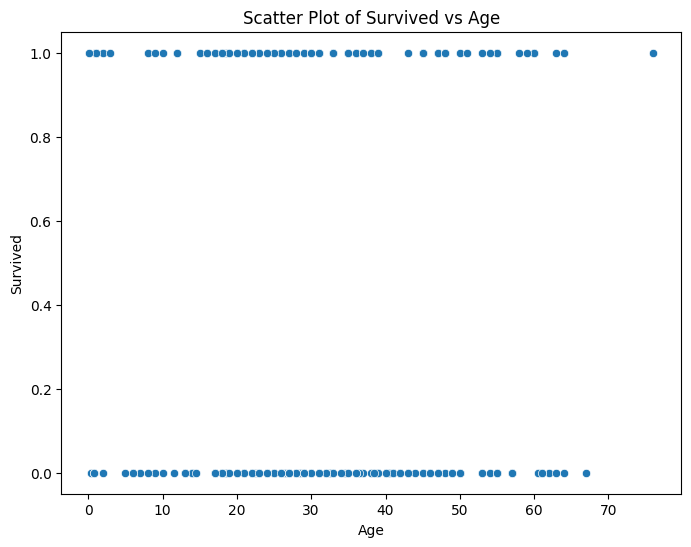

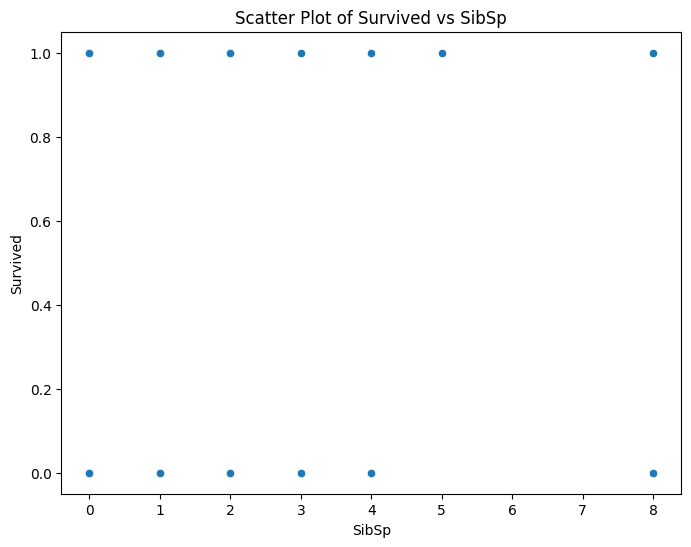

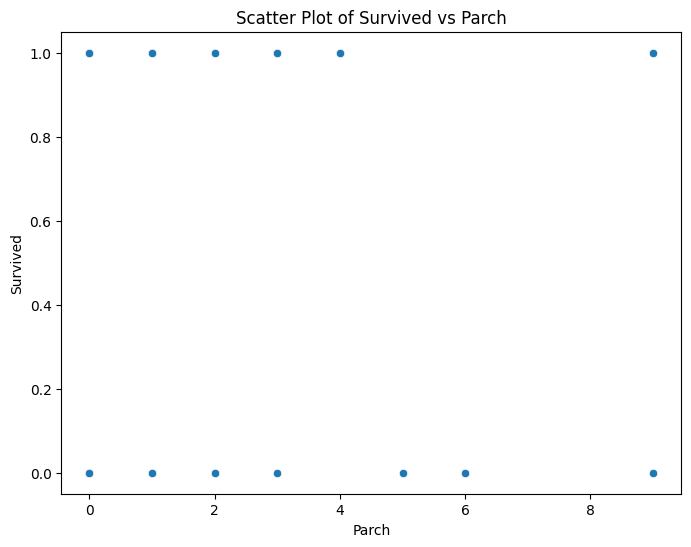

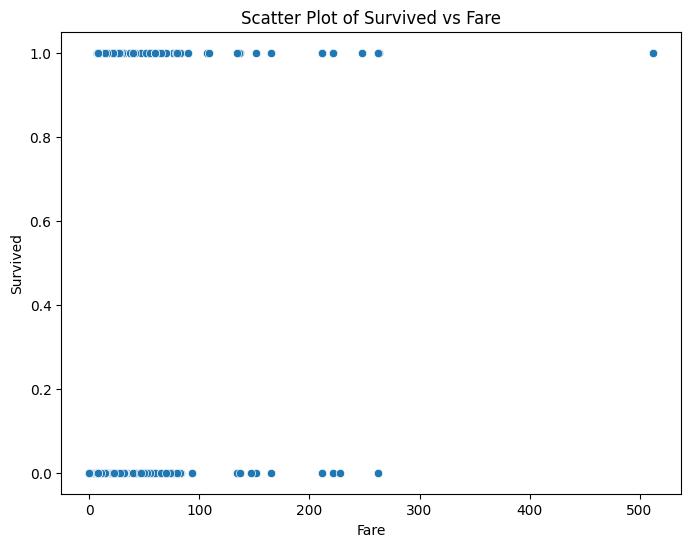

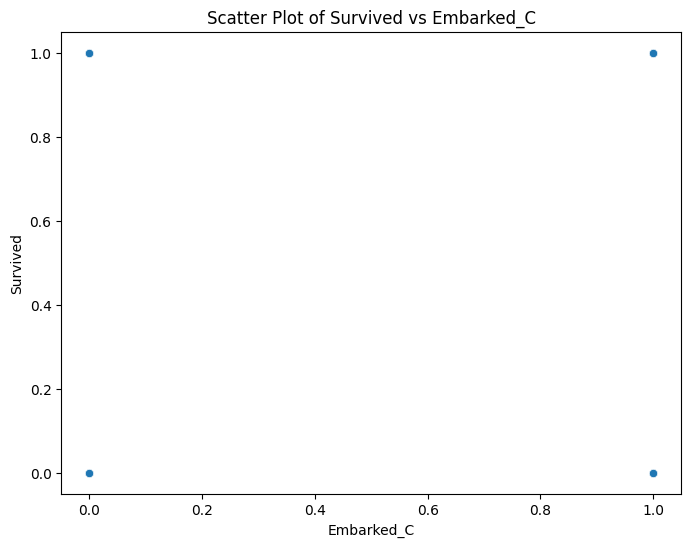

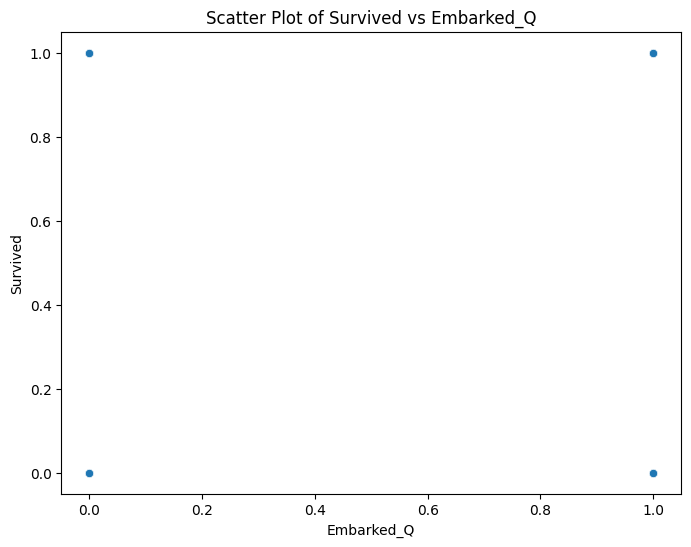

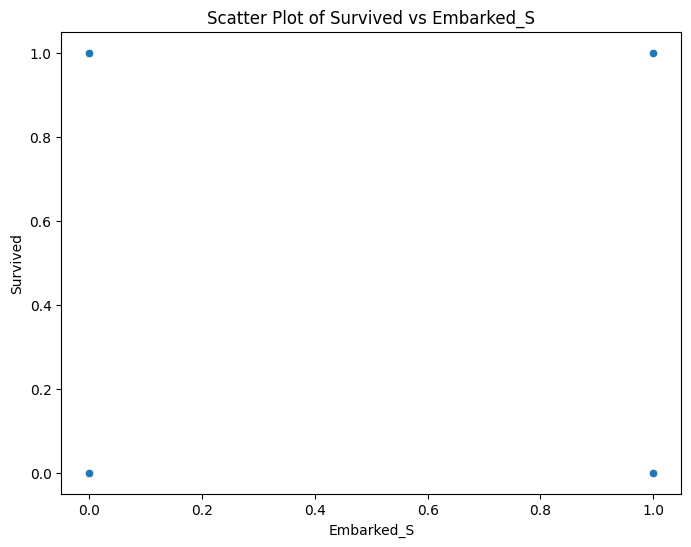

In [20]:
# Iterate through all columns except 'Survived'
for col in df.columns:
    if col != 'Survived':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='Survived', data=df)
        plt.title(f'Scatter Plot of Survived vs {col}')
        plt.xlabel(col)
        plt.ylabel('Survived')
        plt.show()


In [21]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the desired strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the numerical columns with missing values
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Check if there are still any missing values
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
numerical_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized DataFrame
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.0,0.000,0.000000,0.015282,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.0,0.5,1.0,0.0,0.000,0.000000,0.018909,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.000,0.000000,0.016908,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,0.125,0.111111,0.023984,0.0,0.0,1.0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:


array([[50,  0],
       [ 0, 34]])

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Initialize and train other classification models
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_pred))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(classification_report(y_test, gb_pred))


# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_pred))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")
print(classification_report(y_test, knn_pred))

#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_pred))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

SVM Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00       